<a href="https://colab.research.google.com/github/mizzony/python_data_analysis/blob/master/Kiki_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Analysis

In this section, we load employee profile data and visualize relationships such as monthly income versus monthly expenses, and time spent reading books.

In [14]:
import pandas as pd
emp_profile = pd.read_csv("/content/drive/MyDrive/Session_1/03_Datasets/employee_profile.csv")

# First few rows
emp_profile.head()

,EmpId,Monthly_Income,Monthly_Expenses,Time_Spent_Reading_Books
0,1,6092,3836.80,29
1,2,2109,1422.85,14
2,3,7177,4717.05,39
3,4,6665,4330.25,1
4,5,8356,5552.40,44


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Column names
print(emp_profile.columns)

Index(['EmpId', 'Monthly_Income', 'Monthly_Expenses',
       'Time_Spent_Reading_Books'],
      dtype='object')


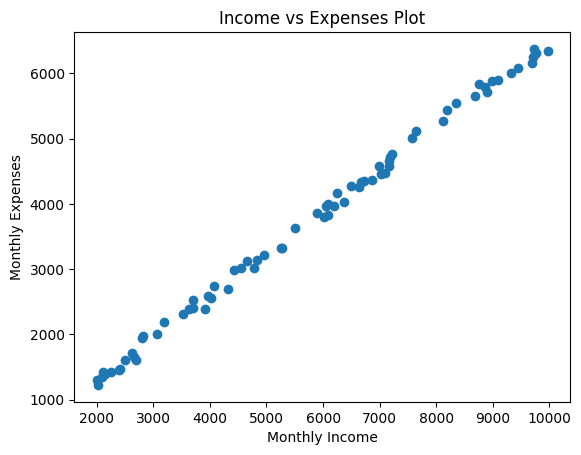

In [17]:
import matplotlib.pyplot as plt

# Drawing the Scatter Plot
plt.scatter(emp_profile["Monthly_Income"], emp_profile["Monthly_Expenses"])
plt.title('Income vs Expenses Plot')
plt.xlabel('Monthly Income')
plt.ylabel('Monthly Expenses')
plt.show()


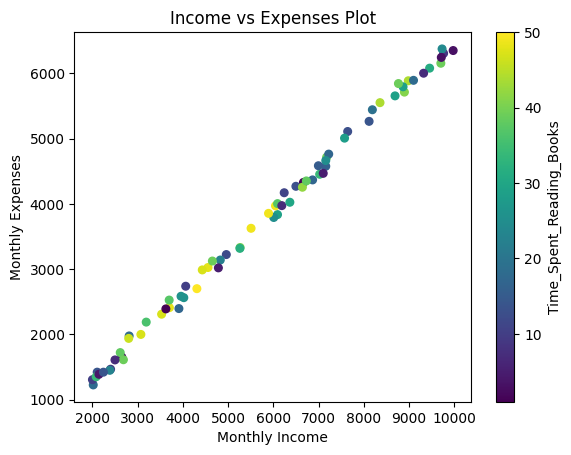

In [18]:
#Scatter plot with 3 variables to see the correlation of the variables
plt.scatter(emp_profile["Monthly_Income"], emp_profile["Monthly_Expenses"],
            s=30,  # Size of dots
            c=emp_profile["Time_Spent_Reading_Books"],  # Color based on another column, e.g., Age
            cmap='viridis')  # Colormap to apply
plt.title('Income vs Expenses Plot')
plt.xlabel('Monthly Income')
plt.ylabel('Monthly Expenses')
plt.colorbar(label='Time_Spent_Reading_Books')  # Show color scale
plt.show()


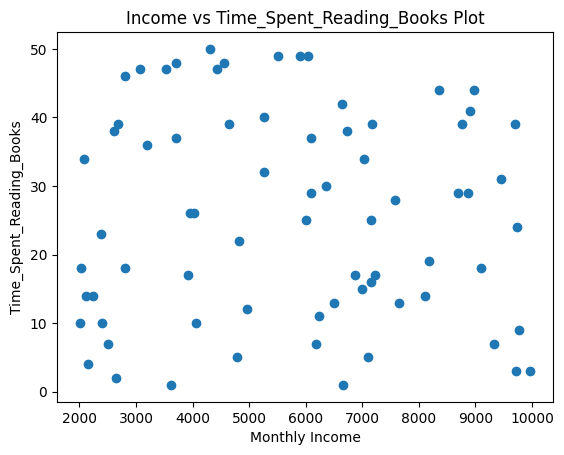

In [ ]:

plt.scatter(emp_profile["Monthly_Income"], emp_profile["Time_Spent_Reading_Books"])
plt.title('Income vs Time_Spent_Reading_Books Plot')
plt.xlabel('Monthly Income')
plt.ylabel('Time_Spent_Reading_Books')
plt.show()

                             EmpId  Monthly_Income  Monthly_Expenses  \
EmpId                     1.000000        0.040007          0.037820   
Monthly_Income            0.040007        1.000000          0.998643   
Monthly_Expenses          0.037820        0.998643          1.000000   
Time_Spent_Reading_Books -0.130653       -0.028255         -0.018103   

                          Time_Spent_Reading_Books  
EmpId                                    -0.130653  
Monthly_Income                           -0.028255  
Monthly_Expenses                         -0.018103  
Time_Spent_Reading_Books                  1.000000  


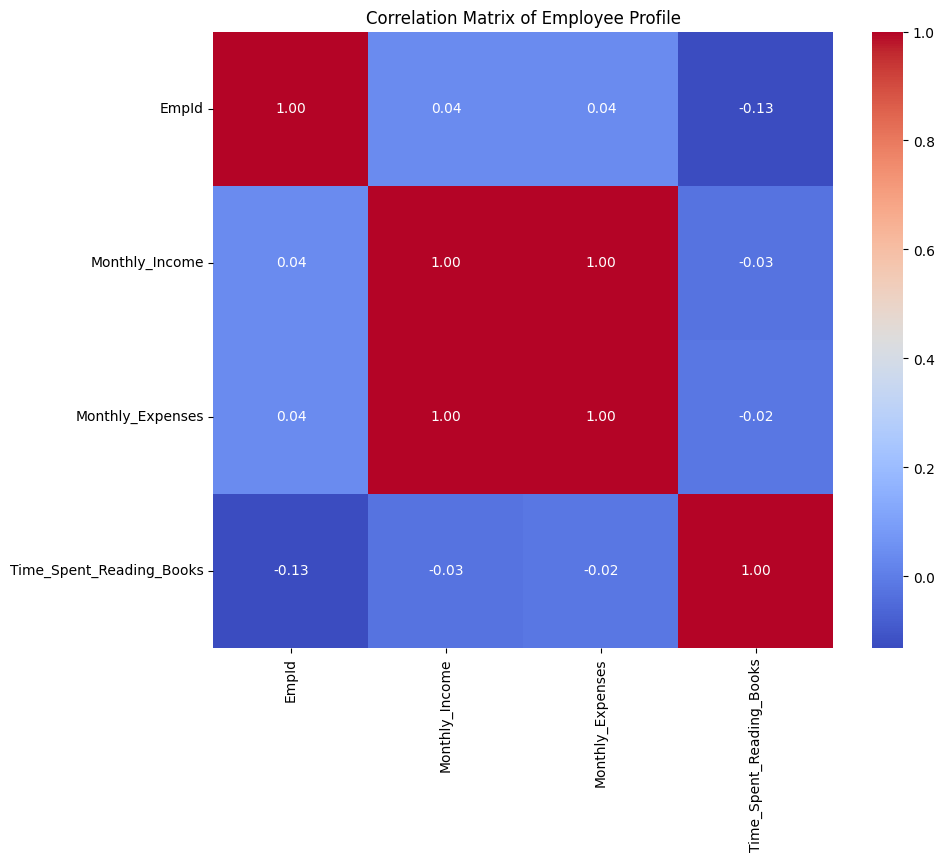

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#This computes the correlation between all pairs of numerical columns in the emp_profile DataFrame.
# Compute the correlation matrix
correlation_matrix = emp_profile.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Employee Profile')
plt.show()


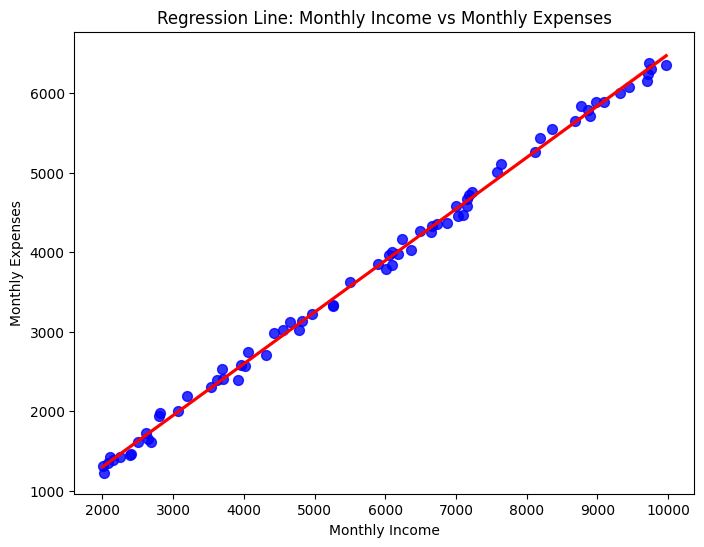

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a regression plot
plt.figure(figsize=(8, 6))
sns.regplot(x="Monthly_Income", y="Monthly_Expenses", data=emp_profile,
            scatter_kws={"color": "blue", "s": 50},  # Adjust scatter plot
            line_kws={"color": "red"})  # Regression line color

# Add labels and title
plt.title('Regression Line: Monthly Income vs Monthly Expenses')
plt.xlabel('Monthly Income')
plt.ylabel('Monthly Expenses')

# Show the plot
plt.show()




In [ ]:
import statsmodels.api as sm

# Define the predictor (independent variable) and response (dependent variable)
X = emp_profile["Monthly_Income"]
y = emp_profile["Monthly_Expenses"]

# Add a constant to the predictor variable (this adds the intercept to the model)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Monthly_Expenses   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.575e+04
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           1.38e-91
Time:                        04:11:40   Log-Likelihood:                -419.43
No. Observations:                  72   AIC:                             842.9
Df Residuals:                      70   BIC:                             847.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.4151     25.121      0.

B**ased on the regression model coefficients you received:** **bold text**
Intercept (const) = 1.4151
Coefficient for Monthly_Income = 0.6489
The linear regression equation is:

Monthly Expenses =1.4151 + 0.6489 ×
Monthly Income
Monthly Expenses=1.4151+0.6489×Monthly Income
This means:

For every 1 unit increase in Monthly Income, the Monthly Expenses increase by approximately 0.6489 units.
The intercept (1.4151) represents the estimated value of Monthly Expenses when Monthly Income is zero.

```
# This is formatted as code
```



In [ ]:
import statsmodels.formula.api as sm
X = emp_profile["Monthly_Income"]
y = emp_profile["Monthly_Expenses"]
model1 = sm.ols(formula='y ~ X', data=emp_profile)
fitted1 = model1.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.575e+04
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           1.38e-91
Time:                        04:25:14   Log-Likelihood:                -419.43
No. Observations:                  72   AIC:                             842.9
Df Residuals:                      70   BIC:                             847.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4151     25.121      0.056      0.955     -48.687      51.517
X              0.6489      0.004    160.454      0.000       0.641       0.657
==============================================================================
Omnibus:                        7.950   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                2.888
Skew:                           0.073   Prob(JB):                        0.236
Kurtosis:                       2.030   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**t-statistic of 0.056: **Indicates that the intercept is likely not significant.

**Prob (F-statistic) of 1.38e-91: **The model overall is very significant, meaning Monthly_Income is a strong predictor of Monthly_Expenses.

**Log-Likelihood of -419.43: **Represents the fit of the model, useful for comparison with other models but less interpretable in isolation.


## Regression Model Building with New Data

Here we build and evaluate regression models to predict the number of passengers based on marketing costs.

In [24]:
air_pass = pd.read_csv("/content/drive/MyDrive/Session_1/03_Datasets/Air_Passengers.csv")
print(air_pass.columns)

Index(['Passengers_count', 'marketing_cost', 'percent_delayed_flights',
       'number_of_trips', 'customer_ratings', 'poor_weather_index',
       'percent_male_customers', 'Holiday_week', 'percent_female_customers'],
      dtype='object')


In [25]:
#Data Exploratory
# Basic data info
print(air_pass.info())

# Check for missing values
print(air_pass.isnull().sum())

# Summary statistics
print(air_pass.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Passengers_count          263 non-null    int64  
 1   marketing_cost            263 non-null    float64
 2   percent_delayed_flights   263 non-null    float64
 3   number_of_trips           263 non-null    int64  
 4   customer_ratings          263 non-null    int64  
 5   poor_weather_index        263 non-null    float64
 6   percent_male_customers    263 non-null    int64  
 7   Holiday_week              263 non-null    int64  
 8   percent_female_customers  263 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 18.6 KB
None
Passengers_count            0
marketing_cost              0
percent_delayed_flights     0
number_of_trips             0
customer_ratings            0
poor_weather_index          0
percent_male_customers      0
Holiday_week             

In [26]:
#Check Data Types and Duplicates:
print(air_pass.dtypes)

# Check for duplicates
print(f"Duplicate rows: {air_pass.duplicated().sum()}")


Passengers_count              int64
marketing_cost              float64
percent_delayed_flights     float64
number_of_trips               int64
customer_ratings              int64
poor_weather_index          float64
percent_male_customers        int64
Holiday_week                  int64
percent_female_customers    float64
dtype: object
Duplicate rows: 0


                          Passengers_count  marketing_cost  \
Passengers_count                  1.000000        0.872221   
marketing_cost                    0.872221        1.000000   
percent_delayed_flights           0.631598        0.462635   
number_of_trips                   0.053853        0.070813   
customer_ratings                  0.319716        0.183011   
poor_weather_index                0.589007        0.424224   
percent_male_customers            0.040058        0.002458   
Holiday_week                      0.564236        0.396973   
percent_female_customers         -0.041289       -0.003882   

                          percent_delayed_flights  number_of_trips  \
Passengers_count                         0.631598         0.053853   
marketing_cost                           0.462635         0.070813   
percent_delayed_flights                  1.000000         0.033323   
number_of_trips                          0.033323         1.000000   
customer_ratings             

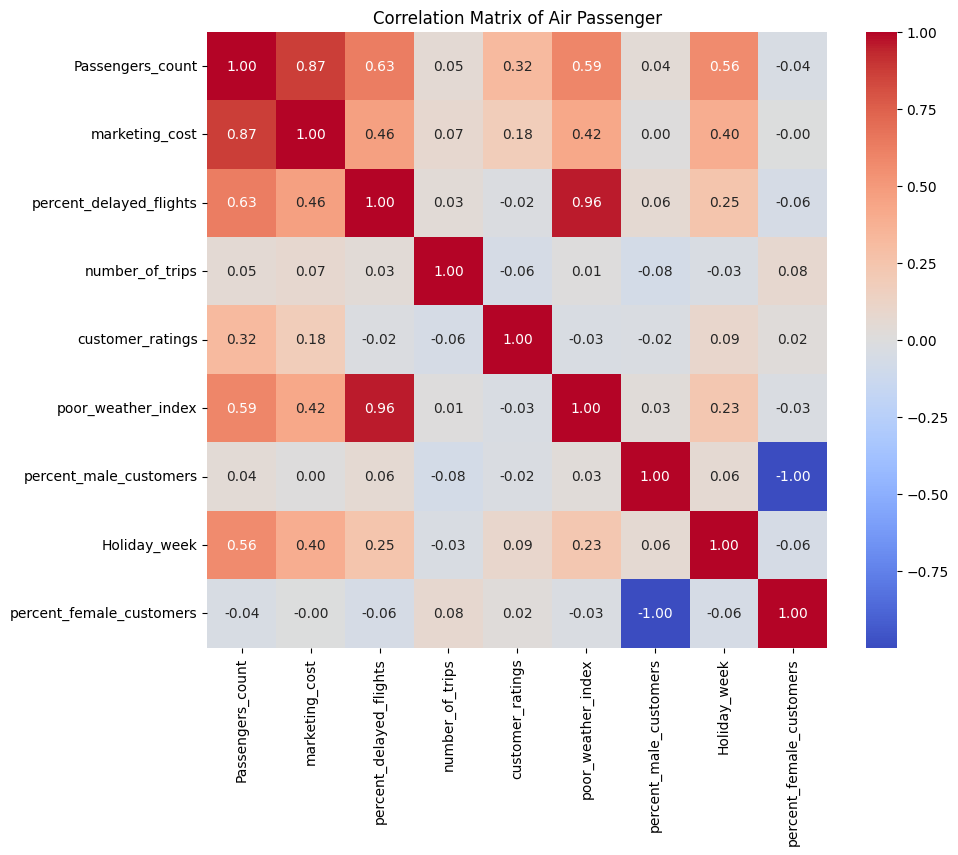

In [ ]:
correlation_matrix = air_pass.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Air Passenger')
plt.show()


# Insights: Look for highly correlated variables that could either suggest multicollinearity (which could affect modeling): or strong relationships, such as:

> Add blockquote


Passengers_count vs. marketing_cost
percent_delayed_flights vs. poor_weather_index

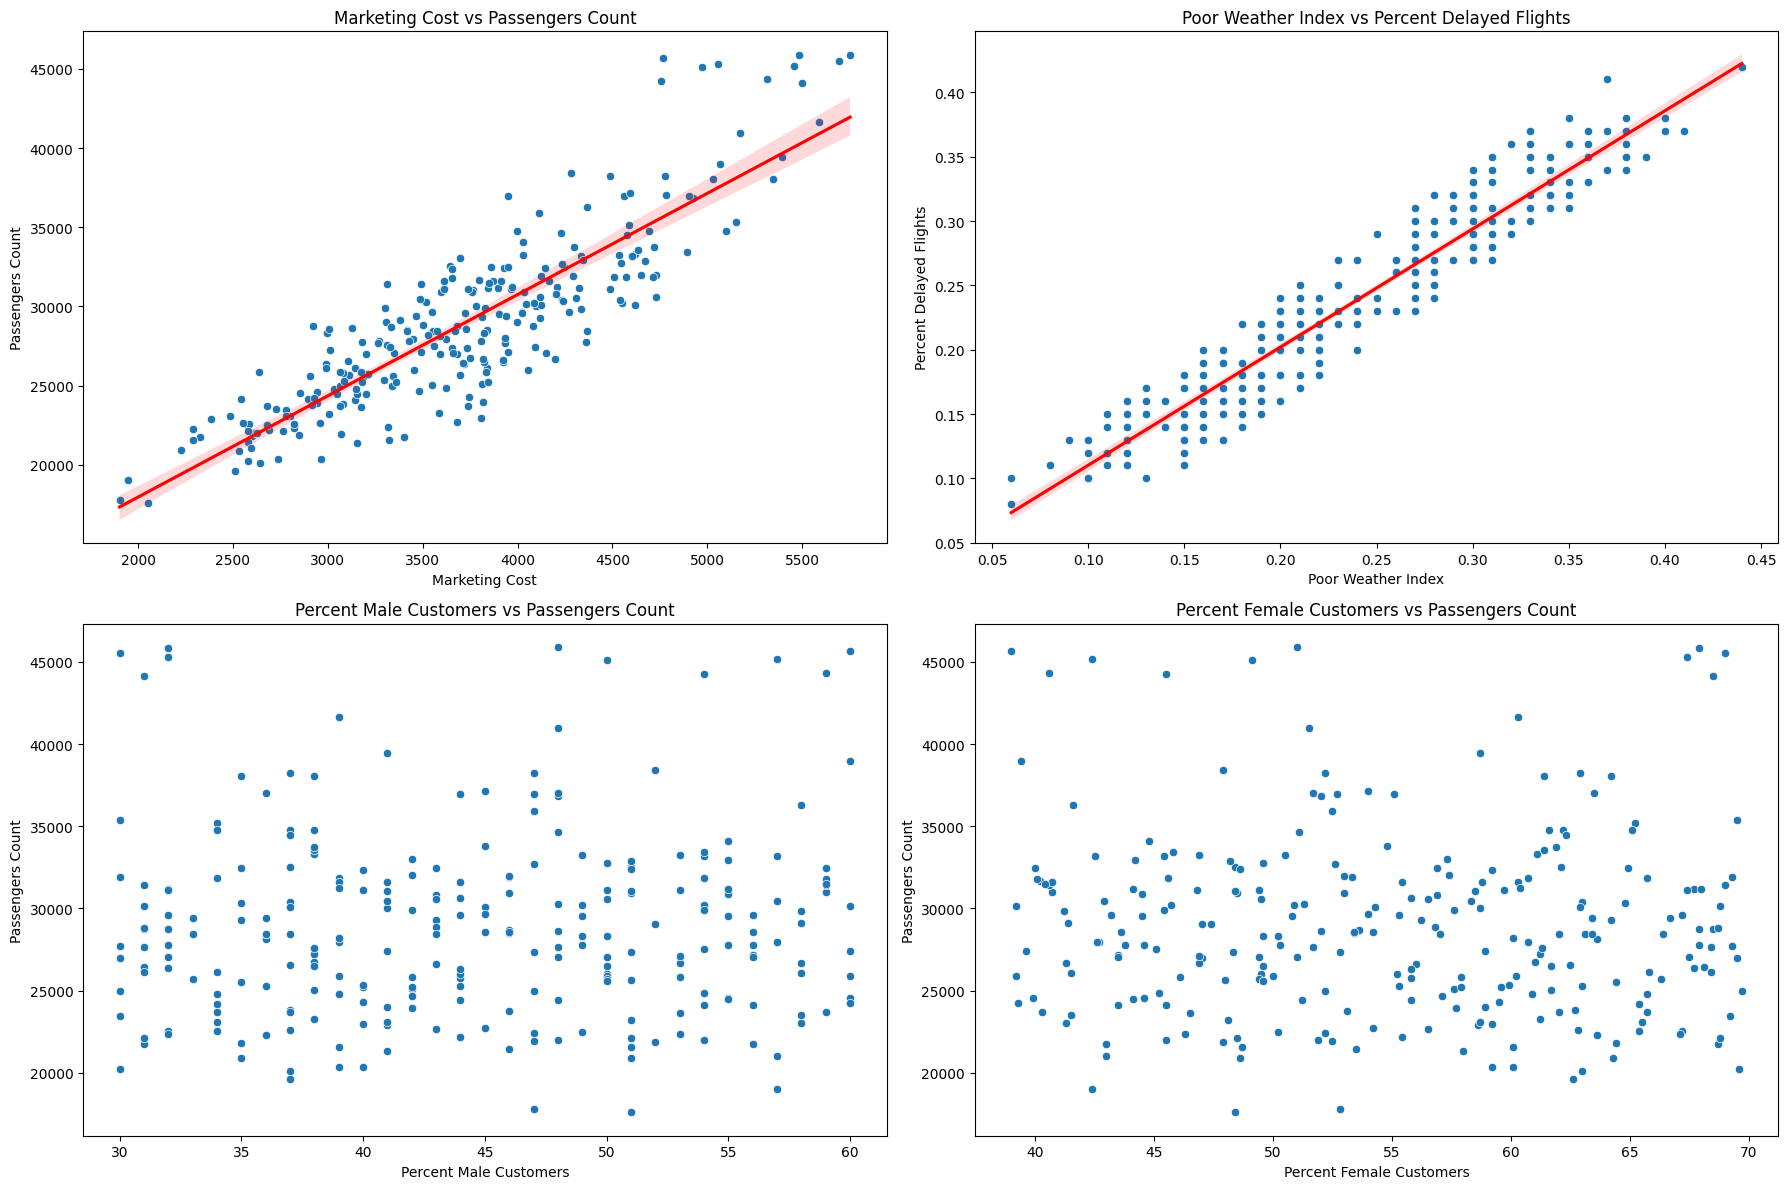

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with the air passenger data
plt.figure(figsize=(18, 12))

# Scatter plot 1: Marketing Cost vs Passengers Count
plt.subplot(2, 2, 1)
sns.scatterplot(x='marketing_cost', y='Passengers_count', data=air_pass)
sns.regplot(x='marketing_cost', y='Passengers_count', data=air_pass, scatter=False, color='red')
plt.title("Marketing Cost vs Passengers Count")
plt.xlabel("Marketing Cost")
plt.ylabel("Passengers Count")

# Scatter plot 2: Poor Weather Index vs Percent Delayed Flights
plt.subplot(2, 2, 2)
sns.scatterplot(x='poor_weather_index', y='percent_delayed_flights', data=air_pass)
sns.regplot(x='poor_weather_index', y='percent_delayed_flights', data=air_pass, scatter=False, color='red')
plt.title("Poor Weather Index vs Percent Delayed Flights")
plt.xlabel("Poor Weather Index")
plt.ylabel("Percent Delayed Flights")

# Scatter plot 3: Percent Male Customers vs Passengers Count
plt.subplot(2, 2, 3)
sns.scatterplot(x='percent_male_customers', y='Passengers_count', data=air_pass)
plt.title("Percent Male Customers vs Passengers Count")
plt.xlabel("Percent Male Customers")
plt.ylabel("Passengers Count")

# Scatter plot 4: Percent Female Customers vs Passengers Count
plt.subplot(2, 2, 4)
sns.scatterplot(x='percent_female_customers', y='Passengers_count', data=air_pass)
plt.title("Percent Female Customers vs Passengers Count")
plt.xlabel("Percent Female Customers")
plt.ylabel("Passengers Count")

# Adjust layout
plt.tight_layout()
plt.show()


In [28]:
import statsmodels.formula.api as sm
model1 = sm.ols(formula='Passengers_count ~ marketing_cost', data=air_pass)
fitted1 = model1.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Passengers_count   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     830.0
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           4.87e-83
Time:                        03:38:00   Log-Likelihood:                -2453.4
No. Observations:                 263   AIC:                             4911.
Df Residuals:                     261   BIC:                             4918.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5186.6868    839.019      6.182      0.000    3534.579    6838.795
marketing_cost     6.3901      0.222     28.810      0.000       5.953       6.827
==============================================================================
Omnibus:                        8.874   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.679
Skew:                           0.342   Prob(JB):                      0.00791
Kurtosis:                       3.644   Cond. No.                     1.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

                            OLS Regression Results                            
Dep. Variable:       Passengers_count   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     830.0
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           4.87e-83
Time:                        04:55:11   Log-Likelihood:                -2453.4
No. Observations:                 263   AIC:                             4911.
Df Residuals:                     261   BIC:                             4918.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5186.6868    839.019      6.

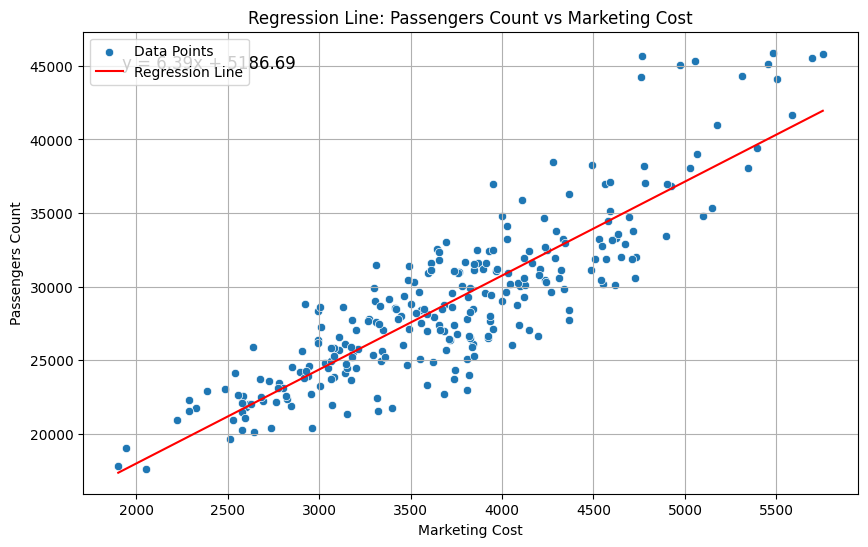

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming air_pass is your DataFrame with the relevant data
# air_pass = pd.read_csv('your_data.csv')  # Load your data

# Fit the regression model
model1 = sm.ols(formula='Passengers_count ~ marketing_cost', data=air_pass)
fitted1 = model1.fit()

# Display the regression model summary
print(fitted1.summary())

# Prepare data for plotting
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='marketing_cost', y='Passengers_count', data=air_pass, label='Data Points')

# Generate the predicted values for the regression line
x_values = np.linspace(air_pass['marketing_cost'].min(), air_pass['marketing_cost'].max(), 100)
y_values = fitted1.predict(pd.DataFrame({'marketing_cost': x_values}))

# Plot the regression line
plt.plot(x_values, y_values, color='red', label='Regression Line')

# Extract coefficients
intercept = fitted1.params['Intercept']
slope = fitted1.params['marketing_cost']

# Create formula string
formula = f'y = {slope:.2f}x + {intercept:.2f}'

# Add formula text to the plot
plt.text(0.05, 0.95, formula, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Add titles and labels
plt.title("Regression Line: Passengers Count vs Marketing Cost")
plt.xlabel("Marketing Cost")
plt.ylabel("Passengers Count")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Prediction from the model
new_data = pd.DataFrame({"marketing_cost": [4500]})
print(fitted1.predict(new_data))

0    33942.146091
dtype: float64


In [ ]:
new_data1 = pd.DataFrame({"marketing_cost": [4500, 3600, 3000, 5000]})
print(fitted1.predict(new_data1))

0    33942.146091
1    28191.054238
2    24356.993003
3    37137.197120
dtype: float64


In [29]:
# Predictions for the data
air_pass["passengers_count_pred"] = round(fitted1.predict(air_pass))
keep_cols = ["marketing_cost", "Passengers_count", "passengers_count_pred"]
air_pass[keep_cols]

,marketing_cost,Passengers_count,passengers_count_pred
0,3588.1,23291,28115.0
1,3186.3,25523,25547.0
2,3342.0,25620,26542.0
3,2512.5,19625,21242.0
4,3012.1,27231,24434.0
...,...,...,...
258,2929.8,24238,23908.0
259,4024.0,29600,30900.0
260,3003.8,28578,24381.0
261,3327.6,27426,26450.0


In [30]:
# R-Squared Value
model2 = sm.ols(formula='Passengers_count ~ customer_ratings', data=air_pass)
fitted2 = model2.fit()
fitted2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Passengers_count   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     29.72
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           1.16e-07
Time:                        03:38:18   Log-Likelihood:                -2627.4
No. Observations:                 263   AIC:                             5259.
Df Residuals:                     261   BIC:                             5266.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.261e+04   1192.915     18.955      0.000    2.03e+04     2.5e+04
customer_ratings   894.4643    164.083      5.451      0.000     571.369    1217.560
==============================================================================
Omnibus:                       28.234   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.541
Skew:                           0.767   Prob(JB):                     1.92e-08
Kurtosis:                       3.944   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multiple Regression

In [31]:
model3 = sm.ols(formula='Passengers_count ~ marketing_cost + percent_delayed_flights + number_of_trips + customer_ratings + poor_weather_index + percent_female_customers + Holiday_week + percent_male_customers', data=air_pass)
fitted3 = model3.fit()
fitted3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Passengers_count   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     325.3
Date:                Tue, 15 Oct 2024   Prob (F-statistic):          8.93e-129
Time:                        03:38:21   Log-Likelihood:                -2323.3
No. Observations:                 263   AIC:                             4665.
Df Residuals:                     254   BIC:                             4697.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 4173.3041   3.71e+04      0.113      0.910   -6.88e+04    7.71e+04
marketing_cost               4.4279      0.168     26.287      0.000       4.096       4.760
percent_delayed_flights   2.187e+04   4827.398      4.530      0.000    1.24e+04    3.14e+04
number_of_trips              0.3004      0.270      1.114      0.266      -0.231       0.831
customer_ratings           546.3104     53.897     10.136      0.000     440.168     652.453
poor_weather_index        -919.5035   4520.130     -0.203      0.839   -9821.210    7982.203
percent_female_customers   -15.7188    371.808     -0.042      0.966    -747.937     716.499
Holiday_week              6804.5389    598.471     11.370      0.000    5625.942    7983.136
percent_male_customers      -7.3113    372.653     -0.020      0.984    -741.195     726.572
==============================================================================
Omnibus:                        0.087   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.957   Jarque-Bera (JB):                0.082
Skew:                           0.041   Prob(JB):                        0.960
Kurtosis:                       2.969   Cond. No.                     1.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

                            OLS Regression Results                            
Dep. Variable:       Passengers_count   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     325.3
Date:                Tue, 15 Oct 2024   Prob (F-statistic):          8.93e-129
Time:                        03:38:45   Log-Likelihood:                -2323.3
No. Observations:                 263   AIC:                             4665.
Df Residuals:                     254   BIC:                             4697.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

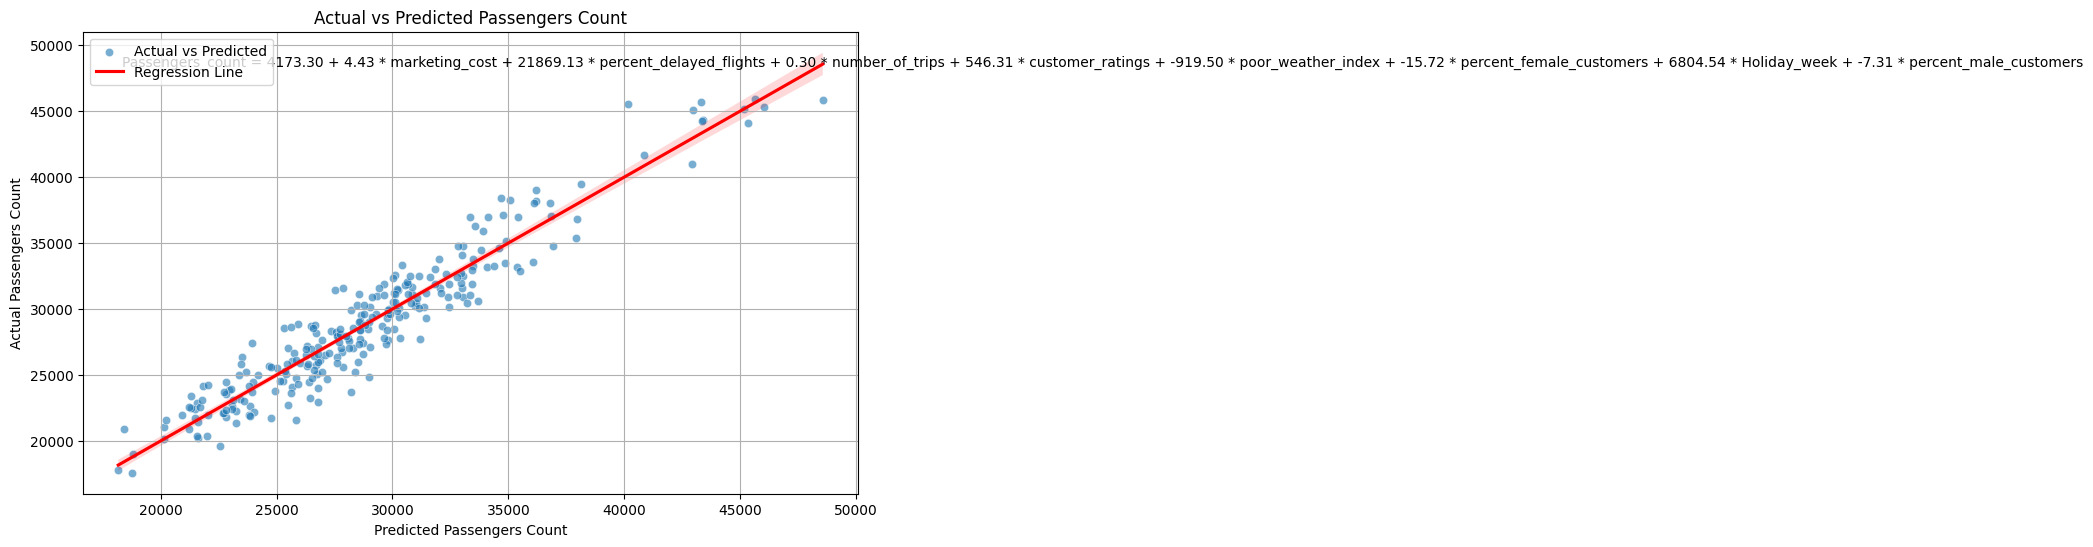

In [32]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming air_pass is your DataFrame with the relevant data
# air_pass = pd.read_csv('your_data.csv')  # Load your data

# Fit the multiple regression model
model3 = sm.ols(formula='Passengers_count ~ marketing_cost + percent_delayed_flights + number_of_trips + customer_ratings + poor_weather_index + percent_female_customers + Holiday_week + percent_male_customers', data=air_pass)
fitted3 = model3.fit()

# Display the regression model summary
print(fitted3.summary())

# Generate predictions
air_pass['Predicted_Passengers'] = fitted3.predict()

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Predicted_Passengers', y='Passengers_count', data=air_pass, alpha=0.6, label='Actual vs Predicted')

# Add a regression line for the actual vs predicted values
sns.regplot(x='Predicted_Passengers', y='Passengers_count', data=air_pass, scatter=False, color='red', label='Regression Line')

# Extract coefficients for the formula
intercept = fitted3.params['Intercept']
coefficients = fitted3.params.drop('Intercept')

# Create formula string
formula_terms = [f'{coefficients[name]:.2f} * {name}' for name in coefficients.index]
formula = f'Passengers_count = {intercept:.2f} + ' + ' + '.join(formula_terms)

# Add formula text to the plot
plt.text(0.05, 0.95, formula, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

# Add titles and labels
plt.title("Actual vs Predicted Passengers Count")
plt.xlabel("Predicted Passengers Count")
plt.ylabel("Actual Passengers Count")
plt.legend()
plt.grid()
plt.show()


In [33]:
#Refine the model pick only the significant one (P< 0.05)
model_refined = sm.ols(formula='Passengers_count ~ marketing_cost + percent_delayed_flights + customer_ratings + Holiday_week', data=air_pass)
fitted_refined = model_refined.fit()
print(fitted_refined.summary())


                            OLS Regression Results                            
Dep. Variable:       Passengers_count   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     655.9
Date:                Tue, 15 Oct 2024   Prob (F-statistic):          7.54e-134
Time:                        03:39:08   Log-Likelihood:                -2324.2
No. Observations:                 263   AIC:                             4658.
Df Residuals:                     258   BIC:                             4676.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                3

In [39]:
#Rpredict for the data
air_pass ["passengers_count_pred"] - round(fitted3.predict(air_pass))
keep_cols = ["Passengers_count","passengers_count_pred"]
air_pass[keep_cols]

,Passengers_count,passengers_count_pred
0,23291,28115.0
1,25523,25547.0
2,25620,26542.0
3,19625,21242.0
4,27231,24434.0
...,...,...
258,24238,23908.0
259,29600,30900.0
260,28578,24381.0
261,27426,26450.0


In [40]:
#test to see if prediction is within treshold or not
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Extract actual and predicted values
actual_values = air_pass['Passengers_count']
predicted_values = air_pass['passengers_count_pred']

# Calculate accuracy metrics
mse = mean_squared_error(actual_values, predicted_values)
mae = mean_absolute_error(actual_values, predicted_values)
r2 = r2_score(actual_values, predicted_values)

# Set a threshold for evaluating predictions (change the value if needed)
threshold = 5

# Calculate the number of predictions within the threshold
within_threshold = (abs(actual_values - predicted_values) <= threshold).sum()
total_predictions = len(actual_values)
percentage_within_threshold = (within_threshold / total_predictions) * 100

# Display the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-Squared: {r2}")
print(f"Threshold: {threshold}")
print(f"Predictions within threshold: {within_threshold}/{total_predictions} ({percentage_within_threshold:.2f}%)")


Mean Squared Error (MSE): 7418669.315589353
Mean Absolute Error (MAE): 2103.0494296577945
R-Squared: 0.7607664342513444
Threshold: 5
Predictions within threshold: 1/263 (0.38%)


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor # Import the correct module

#Check for To check for multicollinearity in your regression model,
#you can use the Variance Inflation Factor (VIF).
#A VIF value greater than 10 is commonly used as a rule of thumb to indicate multicollinearity problems.
# Define the independent variables (excluding the dependent variable)
X = air_pass[['marketing_cost', 'percent_delayed_flights',
               'number_of_trips', 'customer_ratings',
               'poor_weather_index', 'percent_female_customers',
               'Holiday_week', 'percent_male_customers']]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
# Directly call variance_inflation_factor from the correct module
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF results
print(vif_data)

                   Variable            VIF
0                     const  126487.453438
1            marketing_cost       1.510157
2   percent_delayed_flights      13.398038
3           number_of_trips       1.031753
4          customer_ratings       1.060259
5        poor_weather_index      12.805902
6  percent_female_customers     989.913103
7              Holiday_week       1.206890
8    percent_male_customers     990.515808


   percent_male_customers     990.515808
whats next
The VIF results you've obtained indicate significant multicollinearity issues with several variables in your regression model. Here's how to interpret the results and decide on the next steps:

VIF Interpretation
High VIF Values:
percent_delayed_flights (VIF = 13.40): Indicates potential multicollinearity.
poor_weather_index (VIF = 12.81): Also indicates potential multicollinearity.
percent_female_customers (VIF = 989.91): Extremely high VIF, indicating a severe multicollinearity issue.
percent_male_customers (VIF = 990.52): Similarly, very high, suggesting a severe multicollinearity issue.
Next Steps
Assess Correlation:

First, check the correlation matrix of these variables to identify pairs of highly correlated variables. This can help you understand the relationships and decide which variable to retain or remove.


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming air_pass is your original DataFrame

# Step 1: Create the new variable 'total_percent_customers'
air_pass['total_percent_customers'] = air_pass['percent_female_customers'] + air_pass['percent_male_customers']

# Step 2: Create a new DataFrame without the old columns
air_pass_reduced = air_pass.drop(columns=['percent_female_customers', 'percent_male_customers'])

# Step 3: Define the independent variables for the regression model
X_reduced = air_pass_reduced[['marketing_cost', 'percent_delayed_flights',
                               'customer_ratings', 'poor_weather_index',
                               'Holiday_week', 'total_percent_customers']]


# Add a constant to the model
X_reduced = sm.add_constant(X_reduced)

# Step 4: Fit the multiple regression model
model_reduced = sm.OLS(air_pass_reduced['Passengers_count'], X_reduced)
fitted_reduced = model_reduced.fit()

# Display the summary of the regression model
print(fitted_reduced.summary())

# Step 5: Check for multicollinearity again
vif_reduced_data = pd.DataFrame()
vif_reduced_data["Variable"] = X_reduced.columns
# Call variance_inflation_factor directly instead of through sm.stats.outliers_influence
vif_reduced_data["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]

# Display the VIF results
print(vif_reduced_data)


                            OLS Regression Results                            
Dep. Variable:       Passengers_count   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     434.2
Date:                Mon, 14 Oct 2024   Prob (F-statistic):          4.57e-131
Time:                        05:26:45   Log-Likelihood:                -2324.1
No. Observations:                 263   AIC:                             4662.
Df Residuals:                     256   BIC:                             4687.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    7

In [ ]:
correlation_matrix = air_pass_reduced[['percent_delayed_flights', 'poor_weather_index']].corr()
print(correlation_matrix)


                         percent_delayed_flights  poor_weather_index
percent_delayed_flights                 1.000000            0.958821
poor_weather_index                      0.958821            1.000000


In [ ]:
# Example of removing one variable based on correlation
model_final = sm.OLS(air_pass_reduced['Passengers_count'], X_reduced.drop(columns=['poor_weather_index']))
fitted_final = model_final.fit()
print(fitted_final.summary())


                            OLS Regression Results                            
Dep. Variable:       Passengers_count   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     522.7
Date:                Mon, 14 Oct 2024   Prob (F-statistic):          2.05e-132
Time:                        05:33:21   Log-Likelihood:                -2324.2
No. Observations:                 263   AIC:                             4660.
Df Residuals:                     257   BIC:                             4682.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    6

In [ ]:
# Get the coefficients and intercept from the fitted model
intercept = fitted_final.params['const']
coefficients = fitted_final.params.drop('const')

# Create the linear equation string
equation = f"Passengers_count = {intercept:.4f}"

for var, coef in coefficients.items():
    equation += f" + ({coef:.4f}) * {var}"

# Print the final multiple linear regression equation
print(equation)


Passengers_count = 6613.3414 + (4.4430) * marketing_cost + (21003.1364) * percent_delayed_flights + (541.5044) * customer_ratings + (6779.6133) * Holiday_week + (-32.6397) * total_percent_customers


## Handling Multicollinearity in Regression Models

In this section, we address multicollinearity using VIF calculations and update models accordingly.

In [ ]:
# Multicollinearity
income_expenses = pd.read_csv("/content/customer_income_expenses.csv")

print(income_expenses.columns)

model4 = sm.ols(formula='Monthly_Expenses ~ Monthly_Income_in_USD + Number_of_Credit_cards + Number_of_personal_loans + Monthly_Income_in_Euro', data=income_expenses)
fitted4 = model4.fit()
fitted4.summary()

Index(['id', 'Monthly_Income_in_USD', 'Number_of_Credit_cards',
       'Number_of_personal_loans', 'Monthly_Income_in_Euro',
       'Monthly_Expenses'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Monthly_Expenses   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     483.1
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           1.31e-48
Time:                        05:10:18   Log-Likelihood:                -512.77
No. Observations:                  72   AIC:                             1036.
Df Residuals:                      67   BIC:                             1047.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -72.6691    143.534     -0.506      0.614    -359.164     213.826
Monthly_Income_in_USD        7.5244    121.538      0.062      0.951    -235.066     250.115
Number_of_Credit_cards      30.2664     53.290      0.568      0.572     -76.100     136.633
Number_of_personal_loans   149.2454    104.408      1.429      0.158     -59.155     357.645
Monthly_Income_in_Euro      -7.6337    135.041     -0.057      0.955    -277.178     261.910
==============================================================================
Omnibus:                       29.413   Durbin-Watson:                   2.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.056
Skew:                           0.104   Prob(JB):                       0.0798
Kurtosis:                       1.719   Cond. No.                     4.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Model after dropping Monthly_Income_in_USD
model5 = sm.ols(formula='Monthly_Expenses ~ Number_of_Credit_cards + Number_of_personal_loans + Monthly_Income_in_Euro', data=income_expenses)
fitted5 = model5.fit()
fitted5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Monthly_Expenses   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     653.7
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           4.71e-50
Time:                        05:10:19   Log-Likelihood:                -512.77
No. Observations:                  72   AIC:                             1034.
Df Residuals:                      68   BIC:                             1043.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -67.9274    120.499     -0.564      0.575    -308.379     172.524
Number_of_Credit_cards      30.1840     52.882      0.571      0.570     -75.339     135.707
Number_of_personal_loans   149.1943    103.638      1.440      0.155     -57.611     356.000
Monthly_Income_in_Euro       0.7267      0.017     43.434      0.000       0.693       0.760
==============================================================================
Omnibus:                       29.870   Durbin-Watson:                   2.600
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.071
Skew:                           0.099   Prob(JB):                       0.0792
Kurtosis:                       1.715   Cond. No.                     1.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# VIF Function to check multicollinearity
def vif_cal(x_vars):
    xvar_names = x_vars.columns
    for i in range(0, xvar_names.shape[0]):
        y = x_vars[xvar_names[i]]
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = sm.ols(formula="y~x", data=x_vars).fit().rsquared
        vif = round(1 / (1 - rsq), 2)
        print(xvar_names[i], " VIF = ", vif)

# Calculating VIF values
vif_cal(x_vars=income_expenses.drop(["Monthly_Expenses"], axis=1))

id  VIF =  1.07
Monthly_Income_in_USD  VIF =  65007299.17
Number_of_Credit_cards  VIF =  15.94
Number_of_personal_loans  VIF =  16.15
Monthly_Income_in_Euro  VIF =  65007347.03


In [ ]:
#Calculating VIF values after dropping Monthly_Income_in_Euro
vif_cal(x_vars=income_expenses.drop(["Monthly_Expenses","Monthly_Income_in_Euro"], axis=1))

id  VIF =  1.06
Monthly_Income_in_USD  VIF =  1.01
Number_of_Credit_cards  VIF =  15.94
Number_of_personal_loans  VIF =  16.14


In [ ]:
#Calculating VIF values after dropping Monthly_Income_in_Euro and Number_of_Credit_cards
vif_cal(x_vars=income_expenses.drop(["Monthly_Expenses","Monthly_Income_in_Euro","Number_of_personal_loans"], axis=1))

id  VIF =  1.01
Monthly_Income_in_USD  VIF =  1.0
Number_of_Credit_cards  VIF =  1.01


In [ ]:
#The Final model after removing all the multicollinearity
model6=sm.ols(formula='Monthly_Expenses ~ Monthly_Income_in_USD+Number_of_Credit_cards', data=income_expenses)
fitted6 = model6.fit()
fitted6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Monthly_Expenses   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     964.5
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           3.71e-51
Time:                        05:10:19   Log-Likelihood:                -513.85
No. Observations:                  72   AIC:                             1034.
Df Residuals:                      69   BIC:                             1041.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -56.3653    121.148     -0.465      0.643    -298.049     185.319
Monthly_Income_in_USD      0.6522      0.015     43.134      0.000       0.622       0.682
Number_of_Credit_cards   103.7997     13.600      7.632      0.000      76.669     130.931
==============================================================================
Omnibus:                       34.625   Durbin-Watson:                   2.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.263
Skew:                           0.067   Prob(JB):                       0.0720
Kurtosis:                       1.682   Cond. No.                     2.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Calculating VIF values for airpassengers data
vif_cal(x_vars=air_pass.drop(["Passengers_count","passengers_count_pred"], axis=1))

marketing_cost  VIF =  inf
percent_delayed_flights  VIF =  inf
number_of_trips  VIF =  inf
customer_ratings  VIF =  inf
poor_weather_index  VIF =  inf
percent_male_customers  VIF =  inf
Holiday_week  VIF =  inf
percent_female_customers  VIF =  inf
Predicted_Passengers  VIF =  inf


<ipython-input-51-6205932054a5>:8: RuntimeWarning: divide by zero encountered in scalar divide
  vif = round(1 / (1 - rsq), 2)
<ipython-input-51-6205932054a5>:8: RuntimeWarning: divide by zero encountered in scalar divide
  vif = round(1 / (1 - rsq), 2)
<ipython-input-51-6205932054a5>:8: RuntimeWarning: divide by zero encountered in scalar divide
  vif = round(1 / (1 - rsq), 2)
<ipython-input-51-6205932054a5>:8: RuntimeWarning: divide by zero encountered in scalar divide
  vif = round(1 / (1 - rsq), 2)
<ipython-input-51-6205932054a5>:8: RuntimeWarning: divide by zero encountered in scalar divide
  vif = round(1 / (1 - rsq), 2)
<ipython-input-51-6205932054a5>:8: RuntimeWarning: divide by zero encountered in scalar divide
  vif = round(1 / (1 - rsq), 2)
<ipython-input-51-6205932054a5>:8: RuntimeWarning: divide by zero encountered in scalar divide
  vif = round(1 / (1 - rsq), 2)
<ipython-input-51-6205932054a5>:8: RuntimeWarning: divide by zero encountered in scalar divide
  vif = round(1 

In [ ]:
#Dropped percent_male_customers due to high VIF
vif_cal(x_vars=air_pass.drop(["Passengers_count","passengers_count_pred", "percent_male_customers"], axis=1))

marketing_cost  VIF =  2711270.22
percent_delayed_flights  VIF =  713933.34
number_of_trips  VIF =  3331.08
customer_ratings  VIF =  283038.66
poor_weather_index  VIF =  1377.02
Holiday_week  VIF =  405394.19
percent_female_customers  VIF =  1322.41
Predicted_Passengers  VIF =  6761785.4


In [ ]:
#Dropped percent_male_customers and percent_delayed_flights due to high VIF
vif_cal(x_vars=air_pass.drop(["Passengers_count","passengers_count_pred","percent_male_customers", "percent_delayed_flights"], axis=1))

marketing_cost  VIF =  55.6
number_of_trips  VIF =  1.14
customer_ratings  VIF =  6.36
poor_weather_index  VIF =  11.72
Holiday_week  VIF =  8.77
percent_female_customers  VIF =  1.09
Predicted_Passengers  VIF =  126.32


In [ ]:
#Model after exclusing the high VIF variables
import statsmodels.formula.api as sm
model7 = sm.ols(formula='Passengers_count ~ marketing_cost+number_of_trips+customer_ratings+poor_weather_index+percent_female_customers+Holiday_week', data=air_pass)
fitted7 = model7.fit()
fitted7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Passengers_count   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     401.2
Date:                Mon, 14 Oct 2024   Prob (F-statistic):          4.35e-127
Time:                        05:10:19   Log-Likelihood:                -2333.5
No. Observations:                 263   AIC:                             4681.
Df Residuals:                     256   BIC:                             4706.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 3659.6674    984.371      3.718      0.000    1721.172    5598.163
marketing_cost               4.5785      0.171     26.797      0.000       4.242       4.915
number_of_trips              0.4177      0.278      1.503      0.134      -0.130       0.965
customer_ratings           547.0027     55.782      9.806      0.000     437.152     656.853
poor_weather_index        1.855e+04   1461.863     12.691      0.000    1.57e+04    2.14e+04
percent_female_customers   -15.5571     12.302     -1.265      0.207     -39.783       8.668
Holiday_week              6802.3234    619.101     10.987      0.000    5583.144    8021.503
==============================================================================
Omnibus:                        1.354   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                1.134
Skew:                           0.154   Prob(JB):                        0.567
Kurtosis:                       3.094   Cond. No.                     5.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Individual impact of the variables
##Drop two variables non-impacful number_of_trips and percent_female_customers
import statsmodels.formula.api as sm
model8 = sm.ols(formula='Passengers_count ~ marketing_cost+customer_ratings+poor_weather_index+Holiday_week', data=air_pass)
fitted8 = model8.fit()
fitted8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Passengers_count   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     597.2
Date:                Mon, 14 Oct 2024   Prob (F-statistic):          4.33e-129
Time:                        05:10:20   Log-Likelihood:                -2335.4
No. Observations:                 263   AIC:                             4681.
Df Residuals:                     258   BIC:                             4699.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3366.1891    664.355      5.067      0.000    2057.941    4674.438
marketing_cost         4.6010      0.170     27.002      0.000       4.265       4.936
customer_ratings     539.0514     55.771      9.665      0.000     429.228     648.875
poor_weather_index  1.852e+04   1465.404     12.638      0.000    1.56e+04    2.14e+04
Holiday_week        6790.5039    618.849     10.973      0.000    5571.866    8009.142
==============================================================================
Omnibus:                        1.156   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.561   Jarque-Bera (JB):                0.970
Skew:                           0.145   Prob(JB):                        0.616
Kurtosis:                       3.070   Cond. No.                     5.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Drop an impactful variable
import statsmodels.formula.api as sm
model9 = sm.ols(formula='Passengers_count ~  customer_ratings+poor_weather_index+Holiday_week', data=air_pass)
fitted9 = model9.fit()
fitted9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Passengers_count   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     145.2
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           3.44e-55
Time:                        05:10:20   Log-Likelihood:                -2511.8
No. Observations:                 263   AIC:                             5032.
Df Residuals:                     259   BIC:                             5046.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            1.45e+04   1016.979     14.257      0.000    1.25e+04    1.65e+04
customer_ratings     834.0677    106.768      7.812      0.000     623.823    1044.312
poor_weather_index  3.379e+04   2639.293     12.801      0.000    2.86e+04     3.9e+04
Holiday_week        1.223e+04   1142.371     10.705      0.000    9979.306    1.45e+04
==============================================================================
Omnibus:                        5.814   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.509
Skew:                           0.330   Prob(JB):                       0.0636
Kurtosis:                       3.257   Cond. No.                         95.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Logistic Regression

We use logistic regression to predict whether a customer bought a product based on their income.

In [11]:
import pandas as pd
# Update the path to the correct location of your file.
# For example, if the file is in the current directory:
product_sales = pd.read_csv("/content/drive/MyDrive/Session_1/03_Datasets/Product_sales.csv")
# Or if it's in a different directory, provide the absolute path:
# product_sales = pd.read_csv("/path/to/your/file/Product_sales.csv")

print(product_sales.columns)

Index(['Income', 'Bought'], dtype='object')


In [12]:
import statsmodels.formula.api as sm
model10 = sm.ols(formula='Bought ~  Income', data=product_sales)
fitted10 = model10.fit()
fitted10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Bought   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     2489.
Date:                Tue, 15 Oct 2024   Prob (F-statistic):          8.50e-189
Time:                        03:27:22   Log-Likelihood:                 96.245
No. Observations:                 467   AIC:                            -188.5
Df Residuals:                     465   BIC:                            -180.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1805      0.015    -11.712      0.000      -0.211      -0.150
Income      2.095e-05    4.2e-07     49.886      0.000    2.01e-05    2.18e-05
==============================================================================
Omnibus:                       77.189   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1010.549
Skew:                           0.076   Prob(JB):                    3.65e-220
Kurtosis:                      10.205   Cond. No.                     6.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Prediction from the model
new_data=pd.DataFrame({"Income":[4000]})
print(fitted10.predict(new_data))

0   -0.096753
dtype: float64


In [ ]:
new_data1=pd.DataFrame({"Income":[85000]})
print(fitted10.predict(new_data1))

0    1.599893
dtype: float64


In [ ]:
#product_sales data sample
print(product_sales.sample(10))

      Income  Bought
230  20335.7       0
136  47299.1       1
278   6004.3       0
265  63438.4       1
388   6105.1       0
267   2468.1       0
374  17223.7       0
237  61138.7       1
418  54236.0       1
380  11891.7       0


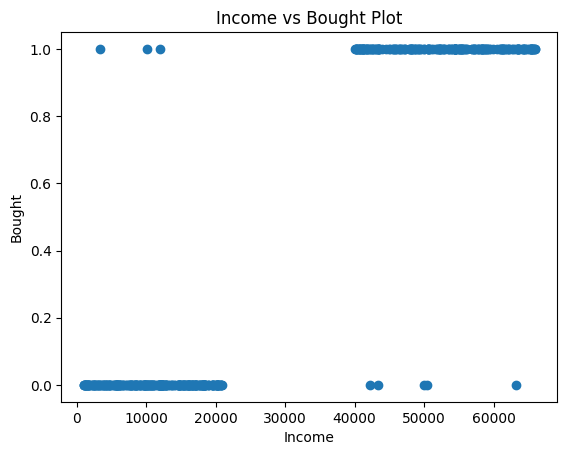

In [ ]:
#Drawing the Scatter Plot
import matplotlib.pyplot as plt
plt.scatter(product_sales["Income"], product_sales["Bought"])
plt.title('Income vs Bought Plot')
plt.xlabel('Income')
plt.ylabel('Bought')
plt.show()

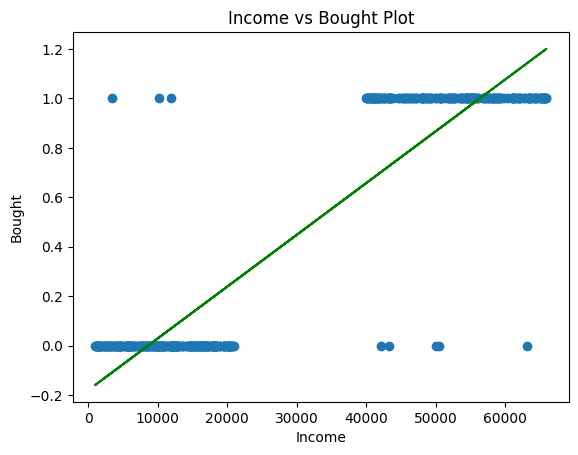

In [ ]:
#Drawing the Regression line
pred_values= fitted10.predict(product_sales["Income"])
plt.scatter(product_sales["Income"], product_sales["Bought"])
plt.plot(product_sales["Income"], pred_values, color='green')
plt.title('Income vs Bought Plot')
plt.xlabel('Income')
plt.ylabel('Bought')
plt.show()

## Logistic Regression Model building

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(product_sales["Bought"],product_sales["Income"])
#Model with intercept
logit_model1=sm.Logit(product_sales["Bought"],sm.add_constant(product_sales["Income"]))
logit_fit1=logit_model1.fit()
logit_fit1.summary()

Optimization terminated successfully.
         Current function value: 0.101165
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Bought   No. Observations:                  467
Model:                          Logit   Df Residuals:                      465
Method:                           MLE   Df Model:                            1
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                  0.8525
Time:                        02:32:24   Log-Likelihood:                -47.244
converged:                       True   LL-Null:                       -320.21
Covariance Type:            nonrobust   LLR p-value:                9.637e-121
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.0288      0.739     -9.505      0.000      -8.478      -5.579
Income         0.0002    2.1e-05     10.397      0.000       0.000       0.000
==============================================================================
"""

In [ ]:
# Prediction from the logistic model
new_data = pd.DataFrame({"Constant": [1, 1], "Income": [4000, 85000]})
print(logit_fit1.predict(new_data))

0    0.002118
1    0.999990
dtype: float64


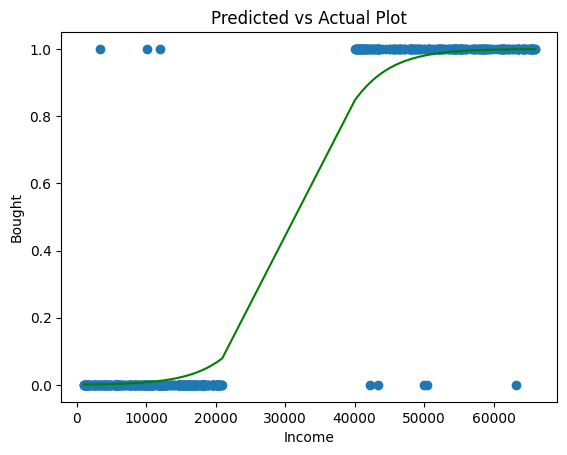

In [ ]:
# Drawing the Logistic Curve
new_data = product_sales.drop(["Bought"], axis=1)
new_data["Constant"] = 1
new_data = new_data[["Constant", "Income"]]
new_data["pred_values"] = logit_fit1.predict(new_data)
new_data["Actual"] = product_sales["Bought"]
new_data = new_data.sort_values(["pred_values"])

plt.scatter(new_data["Income"], new_data["Actual"])
plt.plot(new_data["Income"], new_data["pred_values"], color='green')
plt.title('Predicted vs Actual Plot')
plt.xlabel('Income')
plt.ylabel('Bought')
plt.show()

## Evaluating Model Accuracy

In [ ]:
print(product_sales.head(10))

    Income  Bought
0   2380.0       0
1   7351.1       0
2  48224.4       1
3   4833.0       0
4  18426.1       0
5  52709.0       1
6  54926.7       1
7  52109.3       1
8   8658.6       0
9  12227.9       0


In [ ]:
#Add a new column for intercept. This will be used in prediction
product_sales["Constant"]=1

In [ ]:
#Get the predicted values into a new column
product_sales["pred_Bought"]=logit_fit1.predict(product_sales[["Constant","Income"]])
product_sales["pred_Bought"]=round(product_sales["pred_Bought"])

In [ ]:
#Data after updating with predicted values
print(product_sales[["Bought","pred_Bought"]])

     Bought  pred_Bought
0         0          0.0
1         0          0.0
2         1          1.0
3         0          0.0
4         0          0.0
..      ...          ...
462       0          0.0
463       0          0.0
464       1          1.0
465       1          1.0
466       1          1.0

[467 rows x 2 columns]


## Confusion Matrix

We use confusion matrices to evaluate the accuracy of logistic regression models.

In [ ]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(product_sales["Bought"],product_sales["pred_Bought"])
print(cm1)

[[257   5]
 [  3 202]]


In [ ]:
accuracy1=(cm1[0,0]+cm1[1,1])/(cm1[0,0]+cm1[0,1]+cm1[1,0]+cm1[1,1])
print("Model Accuracy:", accuracy1)

Model Accuracy: 0.9828693790149893


## Confusion Matrix with Visulisation

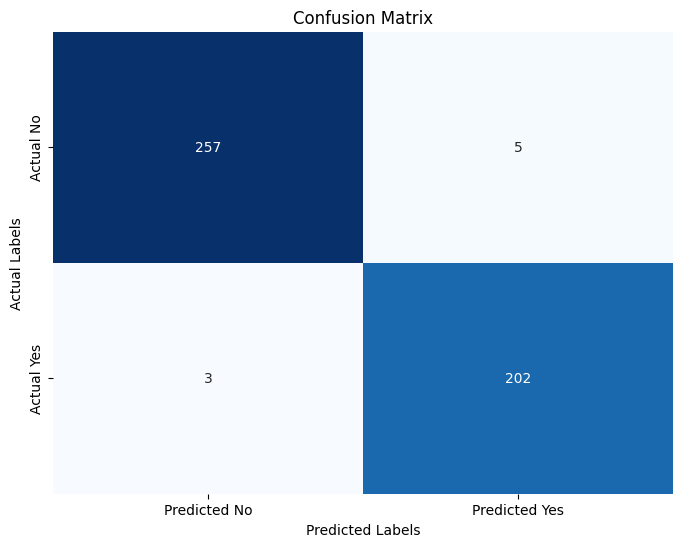

Confusion Matrix Results:

True Negatives (TN): 257 - Correctly predicted as 'not bought'.
False Positives (FP): 5 - Incorrectly predicted as 'bought' (Type I Error).
False Negatives (FN): 3 - Incorrectly predicted as 'not bought' (Type II Error).
True Positives (TP): 202 - Correctly predicted as 'bought'.

Accuracy: 0.98
Precision: 0.98 - The proportion of predicted 'bought' that are actually bought.
Recall: 0.99 - The proportion of actual 'bought' correctly predicted.
F1 Score: 0.98 - The harmonic mean of precision and recall.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming product_sales is your DataFrame containing the actual and predicted values
# Replace 'Bought' and 'pred_Bought' with the actual column names
cm1 = confusion_matrix(product_sales["Bought"], product_sales["pred_Bought"])

# Extract values from the confusion matrix
tn, fp, fn, tp = cm1.ravel()

# Create a heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

# Print the results with explanation
print(f"Confusion Matrix Results:\n")
print(f"True Negatives (TN): {tn} - Correctly predicted as 'not bought'.")
print(f"False Positives (FP): {fp} - Incorrectly predicted as 'bought' (Type I Error).")
print(f"False Negatives (FN): {fn} - Incorrectly predicted as 'not bought' (Type II Error).")
print(f"True Positives (TP): {tp} - Correctly predicted as 'bought'.\n")

# Additional metrics based on confusion matrix:
accuracy = (tp + tn) / (tn + fp + fn + tp)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f} - The proportion of predicted 'bought' that are actually bought.")
print(f"Recall: {recall:.2f} - The proportion of actual 'bought' correctly predicted.")
print(f"F1 Score: {f1_score:.2f} - The harmonic mean of precision and recall.")


# Multiple Logistic Regression

In [ ]:
telco_cust=pd.read_csv("/content/telco_data.csv")
print(telco_cust.shape)
print(telco_cust.columns)

(100000, 11)
Index(['Id', 'Active_cust', 'estimated_income', 'months_on_network',
       'complaints_count', 'plan_changes_count', 'relocated_new_place',
       'monthly_bill_avg', 'CSAT_Survey_Score', 'high_talktime_flag',
       'internet_time'],
      dtype='object')


In [ ]:
import statsmodels.api as sm
logit_model2=sm.Logit(telco_cust['Active_cust'],telco_cust[["estimated_income"]+['months_on_network']+['complaints_count']+['plan_changes_count']+['relocated_new_place']+['monthly_bill_avg']+["CSAT_Survey_Score"]+['high_talktime_flag']+['internet_time']])
logit_fit2=logit_model2.fit()
logit_fit2.summary()

Optimization terminated successfully.
         Current function value: 0.327208
         Iterations 18


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Active_cust   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99991
Method:                           MLE   Df Model:                            8
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                  0.5193
Time:                        02:45:02   Log-Likelihood:                -32721.
converged:                       True   LL-Null:                       -68074.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
estimated_income     5.476e-05   3.15e-05      1.740      0.082   -6.93e-06       0.000
months_on_network      -2.1605      2.473     -0.874      0.382      -7.008       2.687
complaints_count       31.7026     37.097      0.855      0.393     -41.006     104.411
plan_changes_count     -0.5828      0.011    -52.166      0.000      -0.605      -0.561
relocated_new_place    -2.4047      0.047    -51.554      0.000      -2.496      -2.313
monthly_bill_avg       -0.0035      0.000    -17.173      0.000      -0.004      -0.003
CSAT_Survey_Score       3.3119      3.710      0.893      0.372      -3.959      10.583
high_talktime_flag     -0.0354      0.020     -1.763      0.078      -0.075       0.004
internet_time           0.0079   4.68e-05    168.858      0.000       0.008       0.008
=======================================================================================
"""

In [ ]:
#Confuson Matrix and Accuracy
telco_cust["pred_Active_cust"]=logit_fit2.predict(telco_cust.drop(["Id","Active_cust"],axis=1))
telco_cust["pred_Active_cust"]=round(telco_cust["pred_Active_cust"])

In [ ]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(telco_cust["Active_cust"],telco_cust["pred_Active_cust"])
print(cm2)

accuracy2=(cm2[0,0]+cm2[1,1])/(cm2[0,0]+cm2[0,1]+cm2[1,0]+cm2[1,1])
print(accuracy2)

[[35985  6156]
 [ 7443 50416]]
0.86401


## Multicollinearity in logistic regression

In [ ]:
import statsmodels.formula.api as sm1
def vif_cal(x_vars):
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm1.ols(formula="y~x", data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [ ]:
#Calculating VIF values using that function
vif_cal(x_vars=telco_cust.drop(["Id","Active_cust","pred_Active_cust"], axis=1))

estimated_income  VIF =  1.02
months_on_network  VIF =  20991947.38
complaints_count  VIF =  1105768.47
plan_changes_count  VIF =  1.56
relocated_new_place  VIF =  1.63
monthly_bill_avg  VIF =  1.0
CSAT_Survey_Score  VIF =  22885771.92
high_talktime_flag  VIF =  1.0
internet_time  VIF =  1.07


In [ ]:
#Drop CSAT_Survey_Score
vif_cal(x_vars=telco_cust.drop(["Id","Active_cust","pred_Active_cust","CSAT_Survey_Score"], axis=1))

estimated_income  VIF =  1.02
months_on_network  VIF =  1.03
complaints_count  VIF =  1.02
plan_changes_count  VIF =  1.56
relocated_new_place  VIF =  1.63
monthly_bill_avg  VIF =  1.0
high_talktime_flag  VIF =  1.0
internet_time  VIF =  1.07


In [ ]:
import statsmodels.api as sm
logit_model3=sm.Logit(telco_cust['Active_cust'],telco_cust[["estimated_income"]+['months_on_network']+['complaints_count']+['plan_changes_count']+['relocated_new_place']+['monthly_bill_avg']+['high_talktime_flag']+['internet_time']])
logit_fit3=logit_model3.fit()
logit_fit3.summary()

Optimization terminated successfully.
         Current function value: 0.327212
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Active_cust   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99992
Method:                           MLE   Df Model:                            7
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                  0.5193
Time:                        02:47:08   Log-Likelihood:                -32721.
converged:                       True   LL-Null:                       -68074.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
estimated_income     5.457e-05   3.15e-05      1.735      0.083   -7.08e-06       0.000
months_on_network       0.0474      0.001     60.421      0.000       0.046       0.049
complaints_count       -1.4164      0.024    -59.194      0.000      -1.463      -1.370
plan_changes_count     -0.5827      0.011    -52.166      0.000      -0.605      -0.561
relocated_new_place    -2.4051      0.047    -51.561      0.000      -2.496      -2.314
monthly_bill_avg       -0.0035      0.000    -17.172      0.000      -0.004      -0.003
high_talktime_flag     -0.0354      0.020     -1.760      0.078      -0.075       0.004
internet_time           0.0079   4.68e-05    168.861      0.000       0.008       0.008
=======================================================================================
"""

In [ ]:
#Confuson Matrix and Accuracy
telco_cust["pred_Active_cust"]=logit_fit3.predict(telco_cust.drop(["Id","Active_cust","pred_Active_cust","CSAT_Survey_Score"],axis=1))
telco_cust["pred_Active_cust"]=round(telco_cust["pred_Active_cust"])

from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(telco_cust["Active_cust"],telco_cust["pred_Active_cust"])
print(cm3)

accuracy3=(cm3[0,0]+cm3[1,1])/(cm3[0,0]+cm3[0,1]+cm3[1,0]+cm3[1,1])
print(accuracy3)

[[35983  6158]
 [ 7442 50417]]
0.864


## Individual impact of the variables

In [ ]:
#Drop estimated_income and high_talktime_flag
import statsmodels.api as sm
logit_model4=sm.Logit(telco_cust['Active_cust'],telco_cust[['months_on_network']+['complaints_count']+['plan_changes_count']+['relocated_new_place']+['monthly_bill_avg']+['internet_time']])
logit_fit4=logit_model4.fit()
logit_fit4.summary()

Optimization terminated successfully.
         Current function value: 0.327522
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Active_cust   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99994
Method:                           MLE   Df Model:                            5
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                  0.5189
Time:                        02:48:33   Log-Likelihood:                -32752.
converged:                       True   LL-Null:                       -68074.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
months_on_network       0.0463      0.001     69.979      0.000       0.045       0.048
complaints_count       -1.3804      0.013   -105.503      0.000      -1.406      -1.355
plan_changes_count     -0.5807      0.011    -52.132      0.000      -0.603      -0.559
relocated_new_place    -2.3988      0.046    -51.593      0.000      -2.490      -2.308
monthly_bill_avg       -0.0034      0.000    -17.166      0.000      -0.004      -0.003
internet_time           0.0079   4.67e-05    169.255      0.000       0.008       0.008
=======================================================================================
"""

In [ ]:
#Confuson Matrix and Accuracy
telco_cust["pred_Active_cust"]=logit_fit4.predict(telco_cust.drop(["Id","Active_cust","pred_Active_cust","CSAT_Survey_Score","estimated_income","high_talktime_flag"],axis=1))
telco_cust["pred_Active_cust"]=round(telco_cust["pred_Active_cust"])

from sklearn.metrics import confusion_matrix
cm4= confusion_matrix(telco_cust["Active_cust"],telco_cust["pred_Active_cust"])
print(cm4)

accuracy4=(cm4[0,0]+cm4[1,1])/(cm4[0,0]+cm4[0,1]+cm4[1,0]+cm4[1,1])
print(accuracy4)

[[36010  6131]
 [ 7474 50385]]
0.86395
